<a href="https://colab.research.google.com/github/patternproject/r.sb.pos.2/blob/main/Survey_Data_Analysis_v04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#READ ME

##Analysis of Survey Data for POS
##Iteration 2
##Using R

#### Renaming it from:
#### Separate_NorthSouth_Data_v12.ipynb
#### to
#### Survey Data Analysis v01.ipnyb

This file takes in "Extract of Daily POS Data" in excel format and outputs two files, one for North and other for South region

#History

v1: First Iteration

v2: First run of North and South completed

v3: Changed write xlsx to incoporate multiple sheets. Added System Date to Output File Name

v4: Adding create "survey summary" section from "Survey-Summary" colab 

v5: Continuation of v4. Fixing Special characters in Col Names

v6: Continuation of v5. Restructured Code

v7: Fixing Col Names for Without POS

v8: Adding Basic Graphs

v9: Automate UniVariate Analysis using PURRR

v10: Continuation of v9

v11: Continuation of v10. Moving from count to proportions

v12: Continuation of v11

-------------------------------
Renamed as: Survey Data Analysis 01. ipnyb
-------------------------------

v01: No change

v02: Removed code writing output/sample data

v03: Fixing the TODO part for Uni-Var analysis

v04: Pended the TODO part, replicating the Uni-Var analysis done so far on Without POS, on With POS data

Clean data has been dumped in CSV at end of v03, use it to generate it again, if required.

This file replaces the analysis on With POS, instead of copy-pasting to reduce the file size 

## Setup

In [64]:
# Library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

In [65]:
# conditional install - Janitor
list.of.packages <- c("janitor")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(janitor)

In [66]:
# conditional install - openxlsx

list.of.packages <- c("openxlsx")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(openxlsx)

# Setting Input Files

In [67]:
# With POS File
input_file = '/content/With - Survey Summary Report_ 20201113.xlsx'


In [68]:
# Without POS File
input_file_2 = '/content/Without - Survey Summary Report_ 20201113.xlsx'

# Without POS

In [131]:
# reading in input File
##input_file = '/content/WITH - Survey Summary Report_ 20201104.xlsx'
##df_master = read_xlsx(input_file, sheet=1)
df_master = read_xlsx(input_file_2, sheet=1)

In [132]:
# printing DF
print(as_tibble(df_master))

# A tibble: 1,211 x 39
   Date                RespondentId EmployeeCode UserName      BusinessUnit     
   <dttm>                     <dbl>        <dbl> <chr>         <chr>            
 1 2020-10-24 00:00:00         6866        37636 Burhan Ul Haq Managment        
 2 2020-10-25 00:00:00         6881        30919 Farasat Ulla… Customer Service…
 3 2020-10-25 00:00:00         6883        33409 Muhammad Ahm… Customer Service…
 4 2020-10-25 00:00:00         6884        33409 Muhammad Ahm… Customer Service…
 5 2020-10-25 00:00:00         6885        33409 Muhammad Ahm… Customer Service…
 6 2020-10-25 00:00:00         6886        33409 Muhammad Ahm… Customer Service…
 7 2020-10-25 00:00:00         6887        33409 Muhammad Ahm… Customer Service…
 8 2020-10-25 00:00:00         6888        33409 Muhammad Ahm… Customer Service…
 9 2020-10-25 00:00:00         6890        33409 Muhammad Ahm… Customer Service…
10 2020-10-25 00:00:00         6891        30859 Naveed Arshad Customer Service…
# … w

In [133]:
## inspect the data
str(df_master)

tibble[,39] [1,211 × 39] (S3: tbl_df/tbl/data.frame)
 $ Date                                                                                                                      : POSIXct[1:1211], format: "2020-10-24" "2020-10-25" ...
 $ RespondentId                                                                                                              : num [1:1211] 6866 6881 6883 6884 6885 ...
 $ EmployeeCode                                                                                                              : num [1:1211] 37636 30919 33409 33409 33409 ...
 $ UserName                                                                                                                  : chr [1:1211] "Burhan Ul Haq" "Farasat Ullah Shah" "Muhammad Ahmar" "Muhammad Ahmar" ...
 $ BusinessUnit                                                                                                              : chr [1:1211] "Managment" "Customer Services North" "Customer Services North" "Cu

In [134]:
df_master %>% glimpse()

Rows: 1,211
Columns: 39
$ Date                                                                                                                         <dttm> …
$ RespondentId                                                                                                                 <dbl> …
$ EmployeeCode                                                                                                                 <dbl> …
$ UserName                                                                                                                     <chr> …
$ BusinessUnit                                                                                                                 <chr> …
$ Department                                                                                                                   <chr> …
$ `Address of the Outlet:`                                                                                                     <chr> …
$ `City:`                     

In [135]:
colnames(df_master)

[1] "Date"                                                                                                                      
 [2] "RespondentId"                                                                                                              
 [3] "EmployeeCode"                                                                                                              
 [4] "UserName"                                                                                                                  
 [5] "BusinessUnit"                                                                                                              
 [6] "Department"                                                                                                                
 [7] "Address of the Outlet:"                                                                                                    
 [8] "City:"                                                                                                                     
 [9] "Do you believe having a POS will help you â€œImprove Businessâ€\u009d?"                                                    
[10] "Do you have â€œInternet Accessâ€\u009d at your outlet?"                                                                    
[11] "Do you wish to â€œExpand your Businessâ€\u009d to more outlets?"                                                           
[12] "Does your outlet offer â€œDelivery Serviceâ€\u009d?"                                                                       
[13] "For which purposes do you store â€œCustomer Dataâ€\u009d?"                                                                 
[14] "How many â€œEmployeesâ€\u009d do you have in this outlet?"                                                                 
[15] "How much disruption in â€œInternet Serviceâ€\u009d do you face?"                                                           
[16] "If you had to pay for a new POS, which â€œPayment Typeâ€\u009d would you prefer?"                                          
[17] "If you will ever have a POS, what â€œLanguageâ€\u009d would you like to have it in?"                                       
[18] "Name of the Outlet:"                                                                                                       
[19] "Number of years you have owned this organization:"                                                                         
[20] "Please choose the â€œNumber of Outletsâ€\u009d:"                                                                           
[21] "Please choose which â€œKind of POSâ€\u009d will you prefer:"                                                               
[22] "Please provide an amount in PKR you are â€œWilling to Payâ€\u009d, corresponding to last question:"                        
[23] "Please state your â€œPersonal Observationsâ€\u009d which you believe would be interesting to share about this interaction."
[24] "Please take a picture of the outlet, with itâ€™s name visible"                                                             
[25] "Please take a picture of the visiting card"                                                                                
[26] "Region:"                                                                                                                   
[27] "Respondentâ€™s Designation:"                                                                                               
[28] "Respondentâ€™s Name:"                                                                                                      
[29] "Respondentâ€™s Phone number:"                                                                                              
[30] "What are the â€œMost important Featuresâ€\u009d in a POS? You may choose multiple options."                                
[31] "What Device(s) will you like to use for â€œAccessing POSâ€\u009d? You may choose multiple optio

df_1 hereon

In [136]:
df_1 = df_master

In [137]:
nrow(df_1)

[1] 1211

In [138]:
df_1 %>%
  distinct(BusinessUnit)

BusinessUnit
<chr>
Managment
Customer Services North
Customer Services South


In [139]:
# Exclude rows where User is NOT part of Field Team (such as: Burhan)

In [140]:
df_1 %>%
 filter(BusinessUnit != 'Managment') -> df_2

df_2 hereon

In [141]:
nrow(df_2)

[1] 1210

## Cleaning up the col names

#### removing special characters

In [142]:
#x = df_2
y = colnames(df_2) 
colnames(df_2) = str_replace_all(y, "[^[A-Za-z0-9]]", " ") %>% str_replace_all(.,"[ ]+", " ")
colnames(df_2)

[1] "Date"                                                                                                           
 [2] "RespondentId"                                                                                                   
 [3] "EmployeeCode"                                                                                                   
 [4] "UserName"                                                                                                       
 [5] "BusinessUnit"                                                                                                   
 [6] "Department"                                                                                                     
 [7] "Address of the Outlet "                                                                                         
 [8] "City "                                                                                                          
 [9] "Do you believe having a POS will help you Improve Business "                                                    
[10] "Do you have Internet Access at your outlet "                                                                    
[11] "Do you wish to Expand your Business to more outlets "                                                           
[12] "Does your outlet offer Delivery Service "                                                                       
[13] "For which purposes do you store Customer Data "                                                                 
[14] "How many Employees do you have in this outlet "                                                                 
[15] "How much disruption in Internet Service do you face "                                                           
[16] "If you had to pay for a new POS which Payment Type would you prefer "                                           
[17] "If you will ever have a POS what Language would you like to have it in "                                        
[18] "Name of the Outlet "                                                                                            
[19] "Number of years you have owned this organization "                                                              
[20] "Please choose the Number of Outlets "                                                                           
[21] "Please choose which Kind of POS will you prefer "                                                               
[22] "Please provide an amount in PKR you are Willing to Pay corresponding to last question "                         
[23] "Please state your Personal Observations which you believe would be interesting to share about this interaction "
[24] "Please take a picture of the outlet with it s name visible"                                                     
[25] "Please take a picture of the visiting card"                                                                     
[26] "Region "                                                                                                        
[27] "Respondent s Designation "                                                                                      
[28] "Respondent s Name "                                                                                             
[29] "Respondent s Phone number "                                                                                     
[30] "What are the Most important Features in a POS You may choose multiple options "                                 
[31] "What Device s will you like to use for Accessing POS You may choose multiple options "                          
[32] "What kind of a business are you "                                                                               
[33] "What types of Payments do you accept You may choose multiple options "                                          
[34] "Which of the following Discounts do you offer to your customers "   

In [143]:
# using Janitor to clean up names
# https://cran.r-project.org/web/packages/janitor/vignettes/janitor.html#clean-data.frame-names-with-clean_names

In [144]:
df_2 = 
  df_2 %>% clean_names()

In [145]:
colnames(df_2)

[1] "date"                                                                                                          
 [2] "respondent_id"                                                                                                 
 [3] "employee_code"                                                                                                 
 [4] "user_name"                                                                                                     
 [5] "business_unit"                                                                                                 
 [6] "department"                                                                                                    
 [7] "address_of_the_outlet"                                                                                         
 [8] "city"                                                                                                          
 [9] "do_you_believe_having_a_pos_will_help_you_improve_business"                                                    
[10] "do_you_have_internet_access_at_your_outlet"                                                                    
[11] "do_you_wish_to_expand_your_business_to_more_outlets"                                                           
[12] "does_your_outlet_offer_delivery_service"                                                                       
[13] "for_which_purposes_do_you_store_customer_data"                                                                 
[14] "how_many_employees_do_you_have_in_this_outlet"                                                                 
[15] "how_much_disruption_in_internet_service_do_you_face"                                                           
[16] "if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer"                                           
[17] "if_you_will_ever_have_a_pos_what_language_would_you_like_to_have_it_in"                                        
[18] "name_of_the_outlet"                                                                                            
[19] "number_of_years_you_have_owned_this_organization"                                                              
[20] "please_choose_the_number_of_outlets"                                                                           
[21] "please_choose_which_kind_of_pos_will_you_prefer"                                                               
[22] "please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question"                         
[23] "please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction"
[24] "please_take_a_picture_of_the_outlet_with_it_s_name_visible"                                                    
[25] "please_take_a_picture_of_the_visiting_card"                                                                    
[26] "region"                                                                                                        
[27] "respondent_s_designation"                                                                                      
[28] "respondent_s_name"                                                                                             
[29] "respondent_s_phone_number"                                                                                     
[30] "what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options"                                 
[31] "what_device_s_will_you_like_to_use_for_accessing_pos_you_may_choose_multiple_options"                          
[32] "what_kind_of_a_business_are_you"                                                                               
[33] "what_types_of_payments_do_you_accept_you_may_choose_multiple_options"                                          
[34] "which_of_the_following_discounts_do_you_offer_to_your_customers"                                     

#### column mapping

In [147]:
df_3 = df_2 %>% rename(
RESP_ID = 'respondent_id',
SB_EMP_CODE = 'employee_code',
SB_USER_NAME = 'user_name',
SB_BU = 'business_unit',
SB_DEPT = 'department',
ORG_ADDRESS = 'address_of_the_outlet',
ORG_CITY = 'city',
ORG_POS_BUSINESS_IMPROVEMENT = 'do_you_believe_having_a_pos_will_help_you_improve_business',
ORG_INTERNET_ACCESS = 'do_you_have_internet_access_at_your_outlet',
ORG_EXPAND_BUSINESS = 'do_you_wish_to_expand_your_business_to_more_outlets',
ORG_DELIVERY_SERVICE = 'does_your_outlet_offer_delivery_service',
ORG_CUSTOMER_DATA = 'for_which_purposes_do_you_store_customer_data',
ORG_EMP_COUNT = 'how_many_employees_do_you_have_in_this_outlet',
ORG_INTERNET_DISRUPTION = 'how_much_disruption_in_internet_service_do_you_face',
ORG_NEW_POS_PAYMENT_PREF = 'if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer',
ORG_NEW_POS_LANG_PREF = 'if_you_will_ever_have_a_pos_what_language_would_you_like_to_have_it_in',
ORG_NAME = 'name_of_the_outlet',
ORG_RESP_TENURE = 'number_of_years_you_have_owned_this_organization',
ORG_OUTLETS_COUNT = 'please_choose_the_number_of_outlets',
ORG_NEW_POS_KIND = 'please_choose_which_kind_of_pos_will_you_prefer',
ORG_WILLINGNESS_TO_PAY_AMOUNT = 'please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question',
SB_OBSERVATION = 'please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction',
ORG_PICTURE_LINK = 'please_take_a_picture_of_the_outlet_with_it_s_name_visible',
ORG_VISITING_CARD = 'please_take_a_picture_of_the_visiting_card',
SB_REGION = 'region',
RESP_DESIGNATION = 'respondent_s_designation',
RESP_NAME = 'respondent_s_name',
RESP_PHONE = 'respondent_s_phone_number',
ORG_POS_FEATURES = 'what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options',
ORG_NEW_POS_DEVICES = 'what_device_s_will_you_like_to_use_for_accessing_pos_you_may_choose_multiple_options',
ORG_TYPE = 'what_kind_of_a_business_are_you',
ORG_CURRENT_PAYMENT_OPTIONS = 'what_types_of_payments_do_you_accept_you_may_choose_multiple_options',
ORG_DISCOUNTS_OFFERED = 'which_of_the_following_discounts_do_you_offer_to_your_customers',
ORG_URDU_FEATURES_EXPECTED = 'which_of_the_following_features_will_you_like_in_urdu_local_language_you_may_choose_multiple_options',
ORG_REASON_TO_GET_POS = 'which_of_the_following_can_be_a_reason_to_get_pos_you_may_choose_multiple_options',
ORG_REASON_TO_NOT_HAVE_POS = 'why_do_you_not_have_a_pos',
ORG_WILLINGNESS_DEMO = 'will_you_be_willing_to_run_a_demo_of_our_pos_at_your_outlet',
ORG_WILLINGNESS_FUTURE_CONTACT = 'you_have_been_very_helpful_can_we_contact_you_in_future_for_more_details'
)

df_3 hereon

### Data Cleanup

Removing entries where radio button question has multiple options

Fixing ORG_POS_FEATURES

In [149]:

df_POS_FEATURES = data.frame(table(unlist(strsplit(tolower(df_3$ORG_POS_FEATURES), " "))))

In [150]:
str(df_POS_FEATURES)

'data.frame':	51 obs. of  2 variables:
 $ Var1: Factor w/ 51 levels "-","(able","(attendance,",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq: int  13 201 60 1105 181 112 53 50 2391 234 ...


In [95]:
df_POS_FEATURES %>% glimpse()

Rows: 50
Columns: 2
$ Var1 <fct> ",", "(able", "(attendance,", "(balance", "(get", "(manage", "(of…
$ Freq <int> 4, 32, 16, 227, 52, 30, 7, 5, 506, 59, 30, 454, 149, 78, 14, 227,…


In [151]:
t4 <- df_POS_FEATURES %>%
  tabyl(Var1) %>%
  #adorn_percentages("row") %>%
  adorn_pct_formatting(affix_sign = FALSE)

In [152]:
df_POS_FEATURES_2 <- df_POS_FEATURES %>%
  #count(Var1) %>%
  # count creates a column called 'n'
  mutate(percent = round(Freq / sum(Freq) * 100,2))

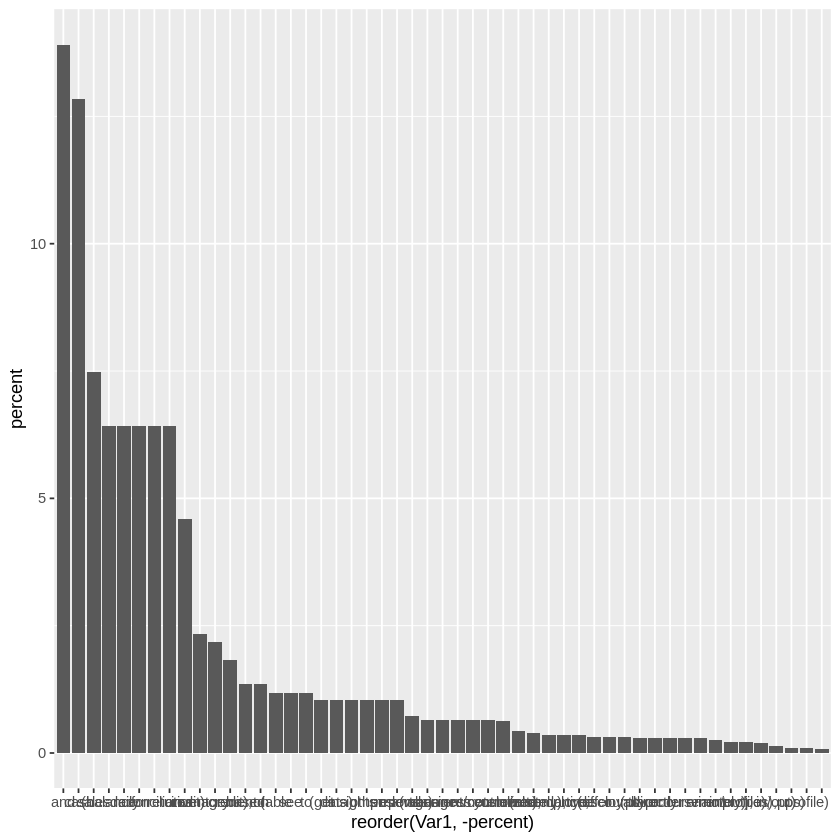

In [153]:
g_no <- df_POS_FEATURES_2 %>%
  ggplot(aes(x=reorder(Var1,-percent),y=percent)) + 
  geom_bar(stat="identity")

g_no

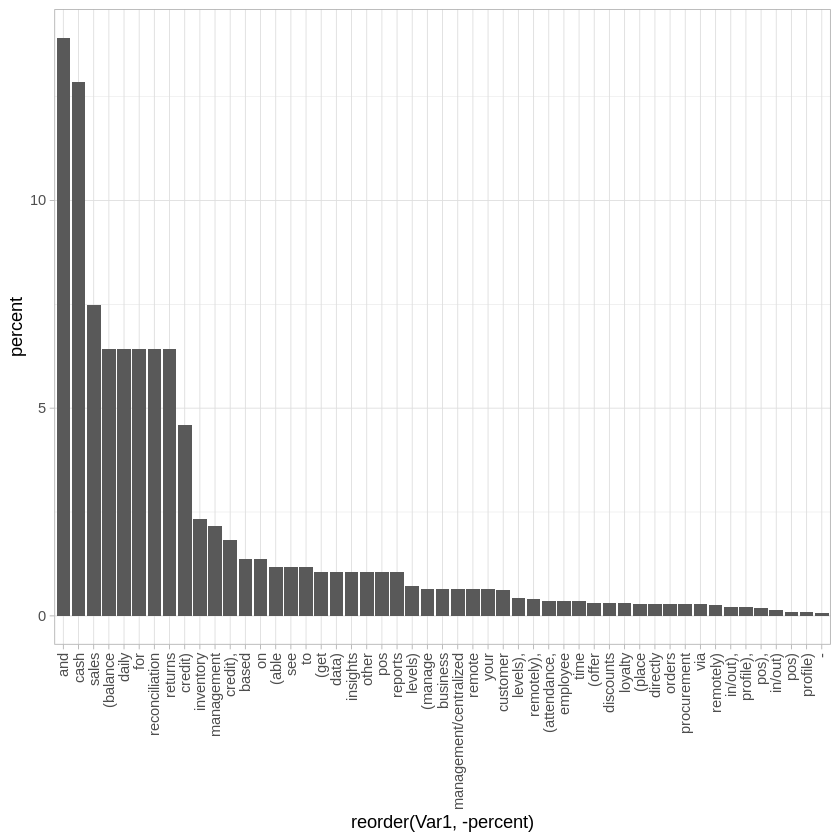

In [154]:
g121 <- g_no + scale_fill_brewer(palette = "Set2") 
g121 <- g121 + theme_light()
g121 <- g121 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g121

### Exp Graphs

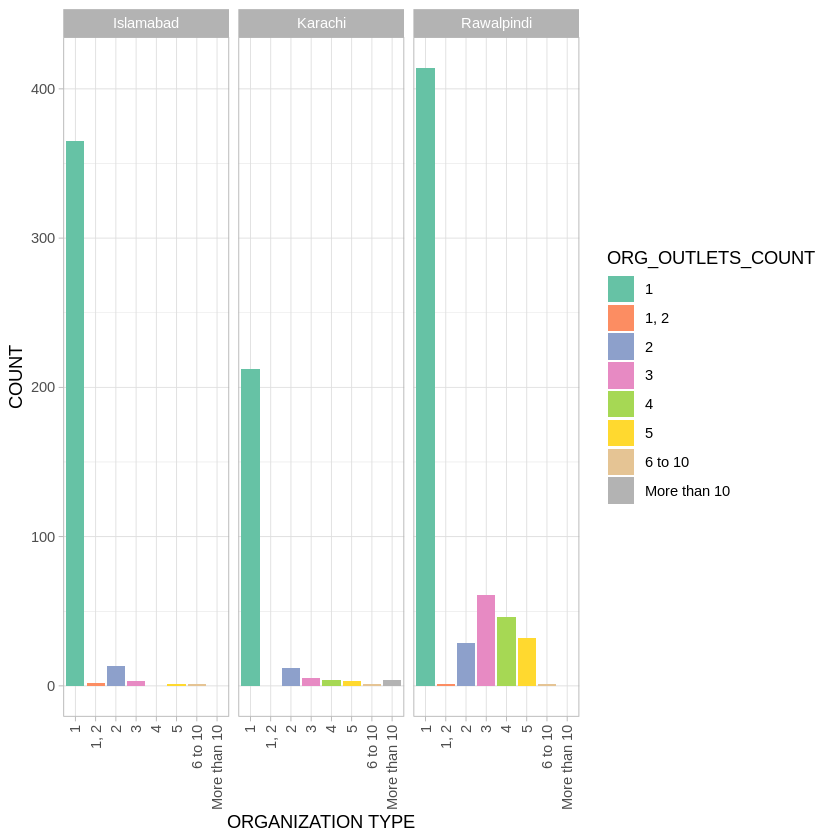

In [155]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_OUTLETS_COUNT)) +
    geom_bar(aes(fill = ORG_OUTLETS_COUNT), position = "dodge") +
    #facet_wrap(~ ORG_REGION)
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "ORGANIZATION TYPE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

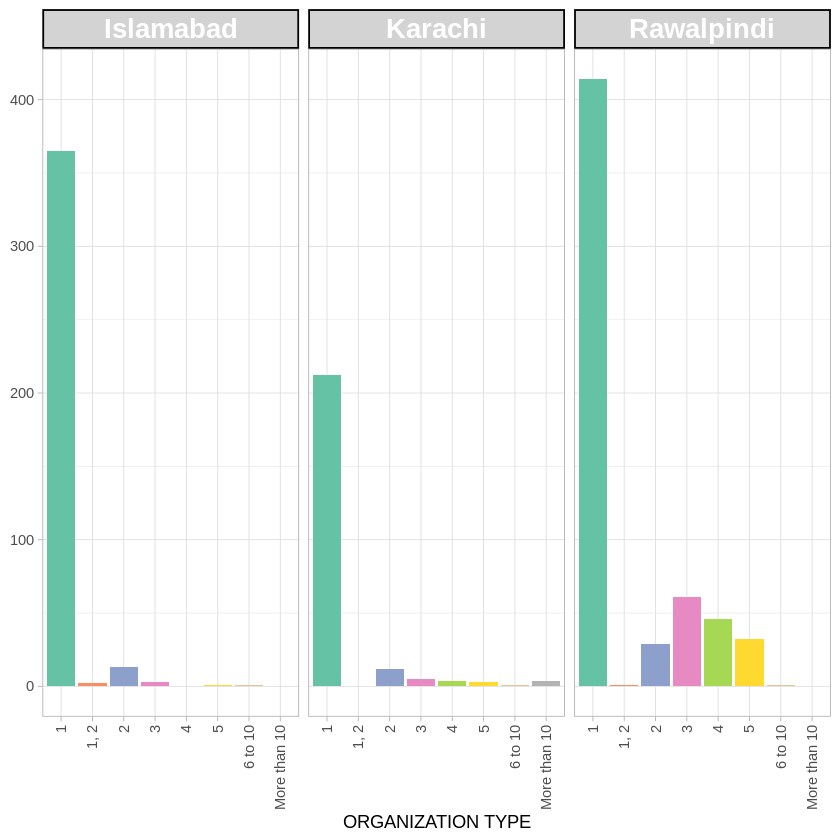

In [156]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

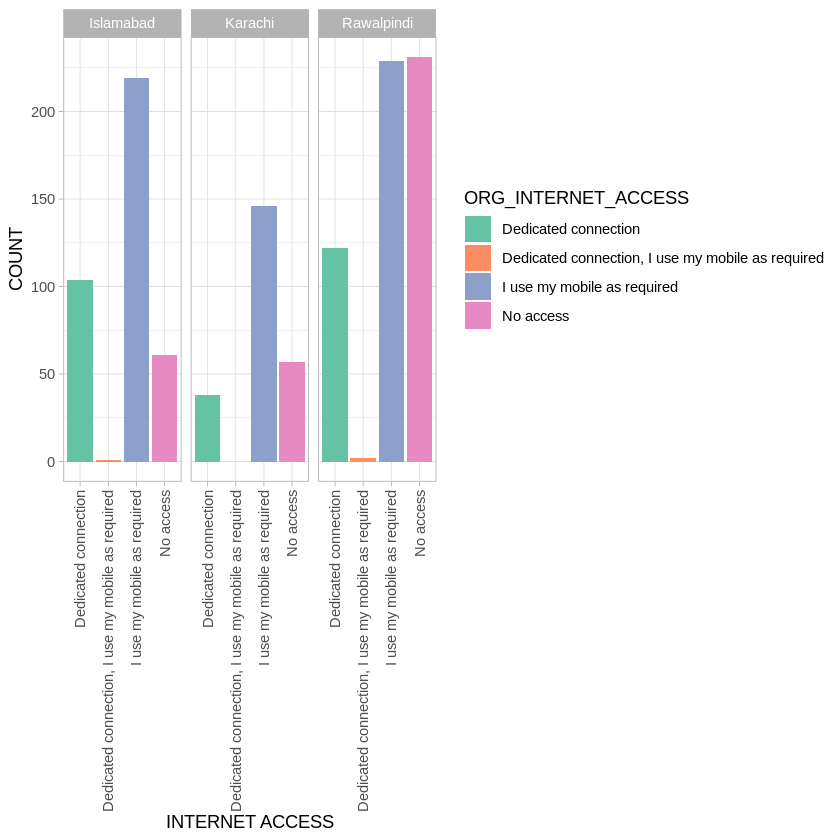

In [157]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_INTERNET_ACCESS)) +
    geom_bar(aes(fill = ORG_INTERNET_ACCESS), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "INTERNET ACCESS", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

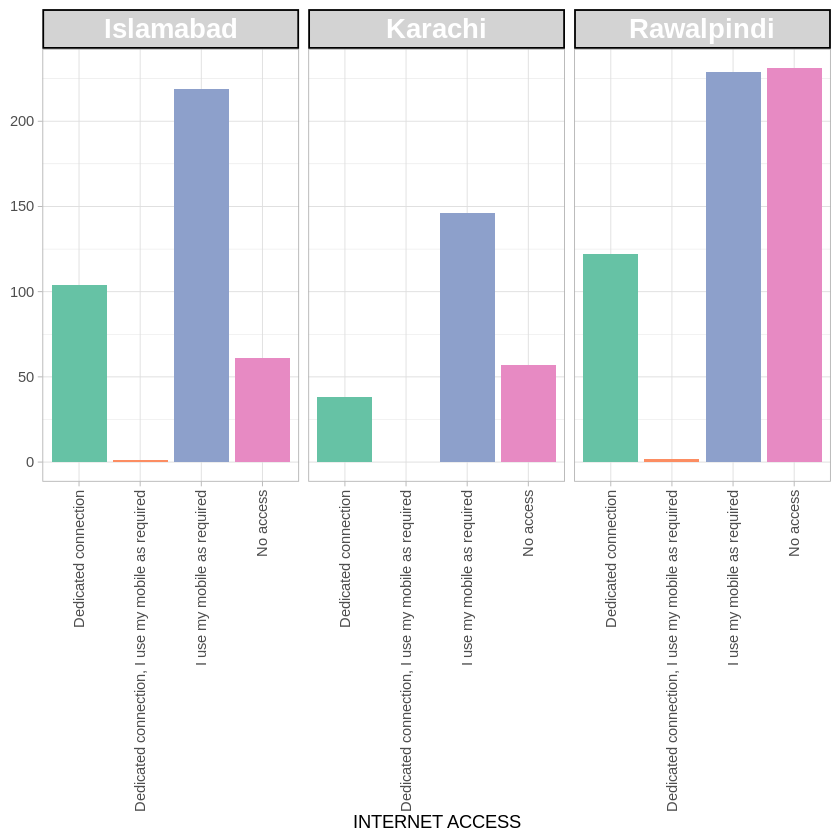

In [158]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

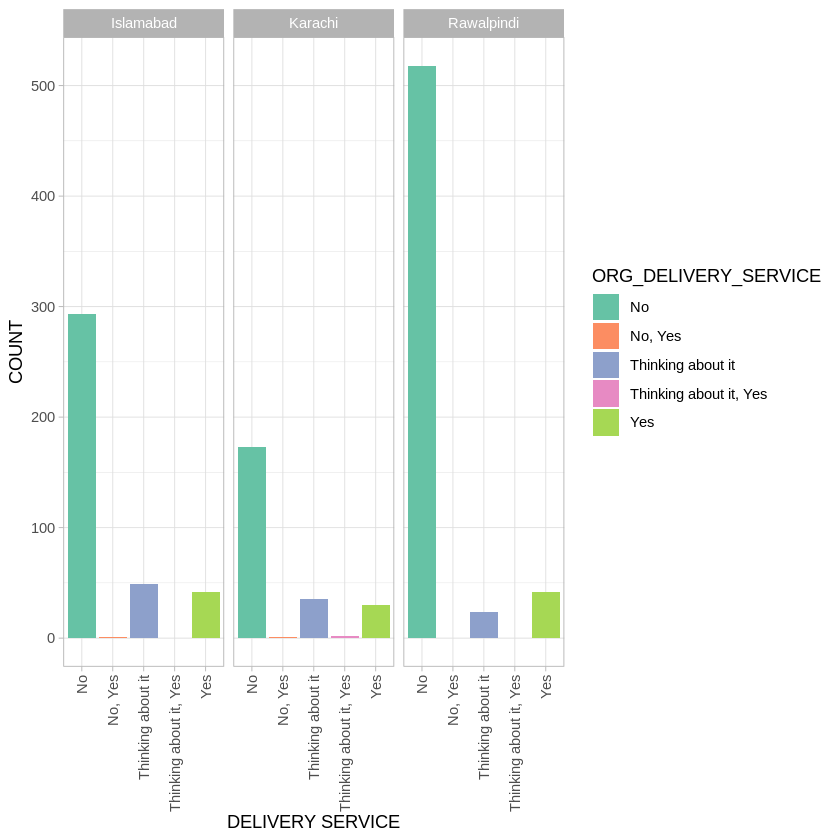

In [159]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_DELIVERY_SERVICE)) +
    geom_bar(aes(fill = ORG_DELIVERY_SERVICE), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "DELIVERY SERVICE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

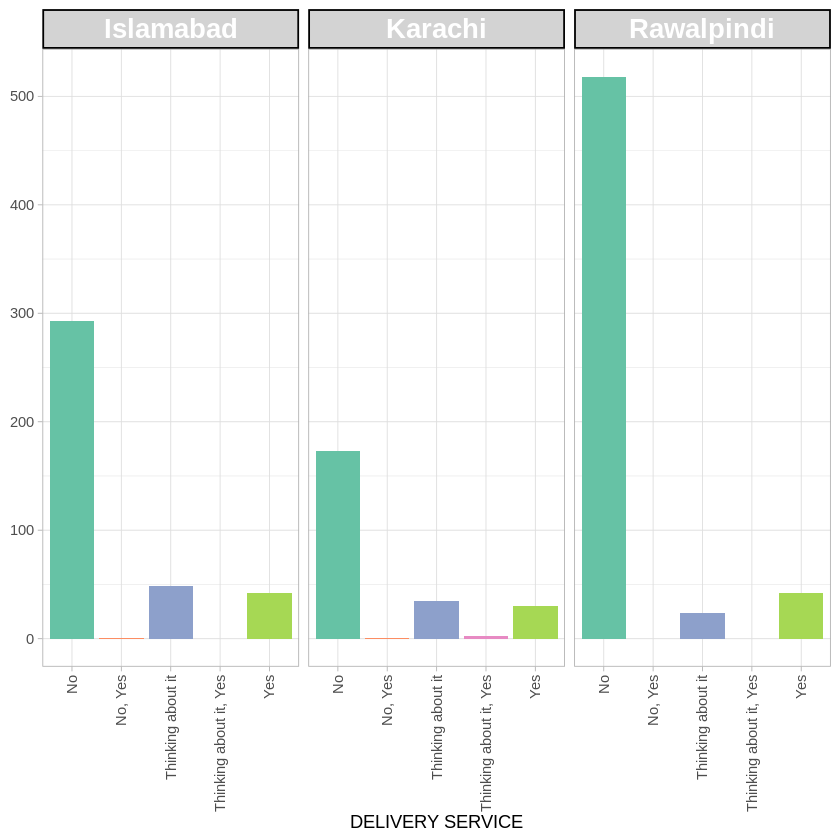

In [160]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

In [161]:
# TODO: compile counts of ORG_CUSTOMER_DATA

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


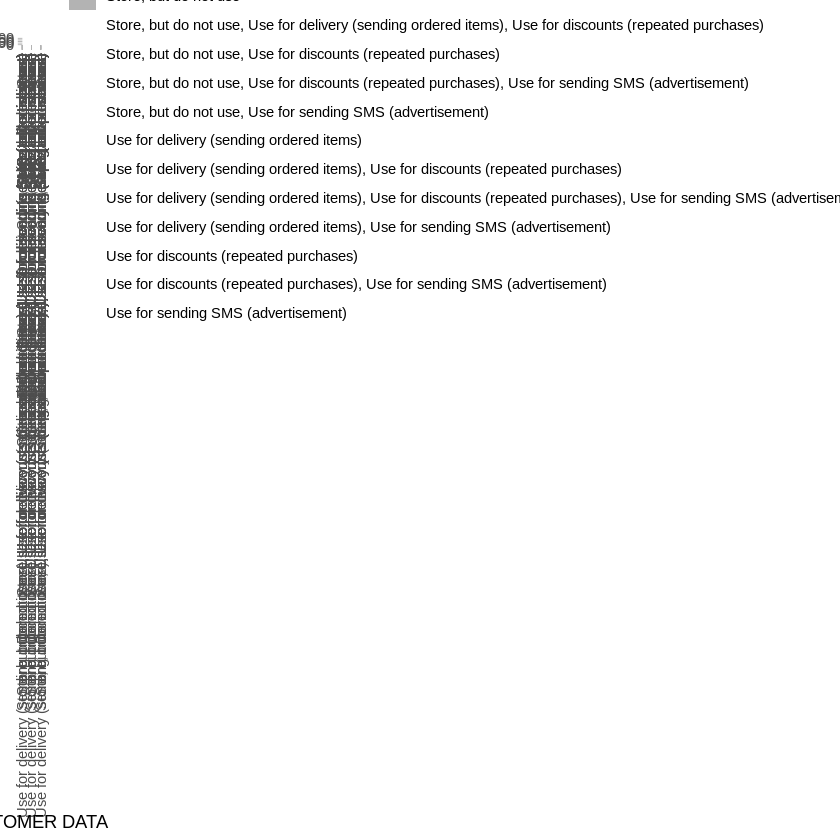

In [162]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_CUSTOMER_DATA)) +
    geom_bar(aes(fill = ORG_CUSTOMER_DATA), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "CUSTOMER DATA", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

### Exp Graphs Via PURRR

In [163]:
# ref: https://aosmith.rbind.io/2018/08/20/automating-exploratory-plots/

In [164]:
# list of variables to plot
colnames(df_3)

[1] "date"                           "RESP_ID"                       
 [3] "SB_EMP_CODE"                    "SB_USER_NAME"                  
 [5] "SB_BU"                          "SB_DEPT"                       
 [7] "ORG_ADDRESS"                    "ORG_CITY"                      
 [9] "ORG_POS_BUSINESS_IMPROVEMENT"   "ORG_INTERNET_ACCESS"           
[11] "ORG_EXPAND_BUSINESS"            "ORG_DELIVERY_SERVICE"          
[13] "ORG_CUSTOMER_DATA"              "ORG_EMP_COUNT"                 
[15] "ORG_INTERNET_DISRUPTION"        "ORG_NEW_POS_PAYMENT_PREF"      
[17] "ORG_NEW_POS_LANG_PREF"          "ORG_NAME"                      
[19] "ORG_RESP_TENURE"                "ORG_OUTLETS_COUNT"             
[21] "ORG_NEW_POS_KIND"               "ORG_WILLINGNESS_TO_PAY_AMOUNT" 
[23] "SB_OBSERVATION"                 "ORG_PICTURE_LINK"              
[25] "ORG_VISITING_CARD"              "SB_REGION"                     
[27] "RESP_DESIGNATION"               "RESP_NAME"                     
[29] "RESP_PHONE"                     "ORG_POS_FEATURES"              
[31] "ORG_NEW_POS_DEVICES"            "ORG_TYPE"                      
[33] "ORG_CURRENT_PAYMENT_OPTIONS"    "ORG_DISCOUNTS_OFFERED"         
[35] "ORG_URDU_FEATURES_EXPECTED"     "ORG_REASON_TO_GET_POS"         
[37] "ORG_REASON_TO_NOT_HAVE_POS"     "ORG_WILLINGNESS_DEMO"          
[39] "ORG_WILLINGNESS_FUTURE_CONTACT"

In [179]:
uni_var = c( 'ORG_POS_BUSINESS_IMPROVEMENT','ORG_INTERNET_ACCESS',
'ORG_EXPAND_BUSINESS','ORG_DELIVERY_SERVICE','ORG_EMP_COUNT',
'ORG_INTERNET_DISRUPTION','ORG_NEW_POS_PAYMENT_PREF','ORG_NEW_POS_LANG_PREF',
'ORG_OUTLETS_COUNT','ORG_NEW_POS_KIND',
'ORG_WILLINGNESS_DEMO',
'ORG_WILLINGNESS_FUTURE_CONTACT')
uni_var = set_names(uni_var)
uni_var

ORG_POS_BUSINESS_IMPROVEMENT              ORG_INTERNET_ACCESS 
  "ORG_POS_BUSINESS_IMPROVEMENT"            "ORG_INTERNET_ACCESS" 
             ORG_EXPAND_BUSINESS             ORG_DELIVERY_SERVICE 
           "ORG_EXPAND_BUSINESS"           "ORG_DELIVERY_SERVICE" 
                   ORG_EMP_COUNT          ORG_INTERNET_DISRUPTION 
                 "ORG_EMP_COUNT"        "ORG_INTERNET_DISRUPTION" 
        ORG_NEW_POS_PAYMENT_PREF            ORG_NEW_POS_LANG_PREF 
      "ORG_NEW_POS_PAYMENT_PREF"          "ORG_NEW_POS_LANG_PREF" 
               ORG_OUTLETS_COUNT                 ORG_NEW_POS_KIND 
             "ORG_OUTLETS_COUNT"               "ORG_NEW_POS_KIND" 
            ORG_WILLINGNESS_DEMO   ORG_WILLINGNESS_FUTURE_CONTACT 
          "ORG_WILLINGNESS_DEMO" "ORG_WILLINGNESS_FUTURE_CONTACT"

TODO

In [112]:
# variables to fix (multiple choice options)

## removed from with pos data, multiple choice or non-relevant
# 'ORG_ADDRESS'
# 'ORG_CITY' --> No point faceting City on city
# 'ORG_CUSTOMER_DATA',
# 'ORG_NAME',
# 'ORG_RESP_TENURE',
# 'ORG_WILLINGNESS_TO_PAY_AMOUNT',
# 'SB_OBSERVATION',
# 'ORG_PICTURE_LINK',
# 'ORG_VISITING_CARD',
# 'SB_REGION',
# 'RESP_DESIGNATION',
# 'RESP_NAME',
# 'RESP_PHONE',
# 'ORG_NEW_POS_DEVICES',
# 'ORG_POS_FEATURES',
# 'ORG_TYPE',
# 'ORG_CURRENT_PAYMENT_OPTIONS',
# 'ORG_DISCOUNTS_OFFERED',
# 'ORG_URDU_FEATURES_EXPECTED',
# 'ORG_REASON_TO_GET_POS',
# 'ORG_REASON_TO_NOT_HAVE_POS',








## removed from with pos data, multiple choice or non-relevant
# ORG_TYPE
# ORG_DISCOUNTS_OFFERED
# ORG_CUSTOMER_DATA
# ORG_POS_FEATURES
# ORG_OLD_POS_PAYMENT_OPTIONS
# ORG_OLD_POS_DEVICES
# ORG_OLD_POS_URDU_FEATURES
# ORG_REASON_TO_REPLACE_POS
# ORG_WILLINGNESS_TO_PAY_AMOUNT
# ORG_OLD_POS_PROVIDER_PAYMENT_METHOD

#### Plotting WorkHorse

In [166]:
bar_fun = function(x, y) {
     ggplot(df_3, aes(x = .data[[x]]) ) +
     geom_bar(aes(fill = .data[[x]]), position = "dodge") +
     facet_wrap(~ .data[[y]]) +
     
     # bars are too little to add data labels
     labs(x = x, y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none"
  )
}

In [167]:
#bar_fun("ORG_DELIVERY_SERVICE", "ORG_CITY")

#### Plotting WorkHorse (Proportions)

In [175]:
bar_prop_fun = function(x, y) {
  
    ggplot(df_3, aes(x = .data[[x]], group = .data[[y]]) ) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..,accuracy=0.1),
                  y= ..prop.. ), stat= "count", 
                  vjust = -.5, size=2 ) +
    facet_grid(~ .data[[y]]) +
    scale_y_continuous(labels = scales::percent) +

    # bars are too little to add data labels
     labs(x = x, y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 5)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none")
}

In [176]:
#bar_prop_fun("ORG_PAY_FOR_OLD_POS","ORG_CITY")

In [180]:

# Now using MAP, fixing facet variable to ORG_CITY
#uni_plots = map(uni_var, ~bar_fun(.x, "ORG_CITY") )
uni_plots = map(uni_var, ~bar_prop_fun(.x, "ORG_CITY") )

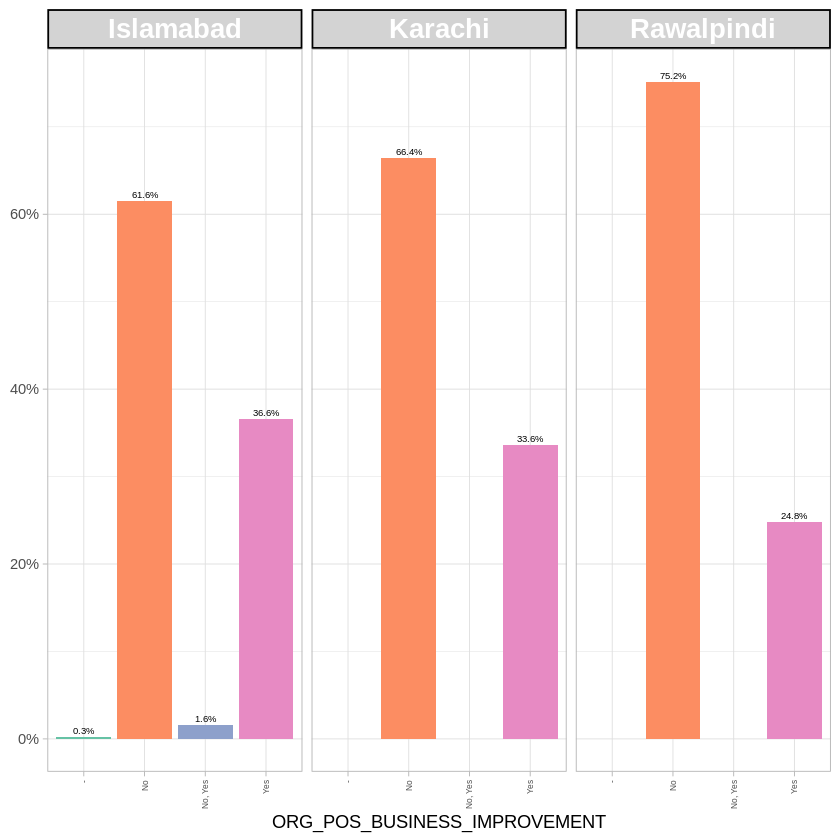

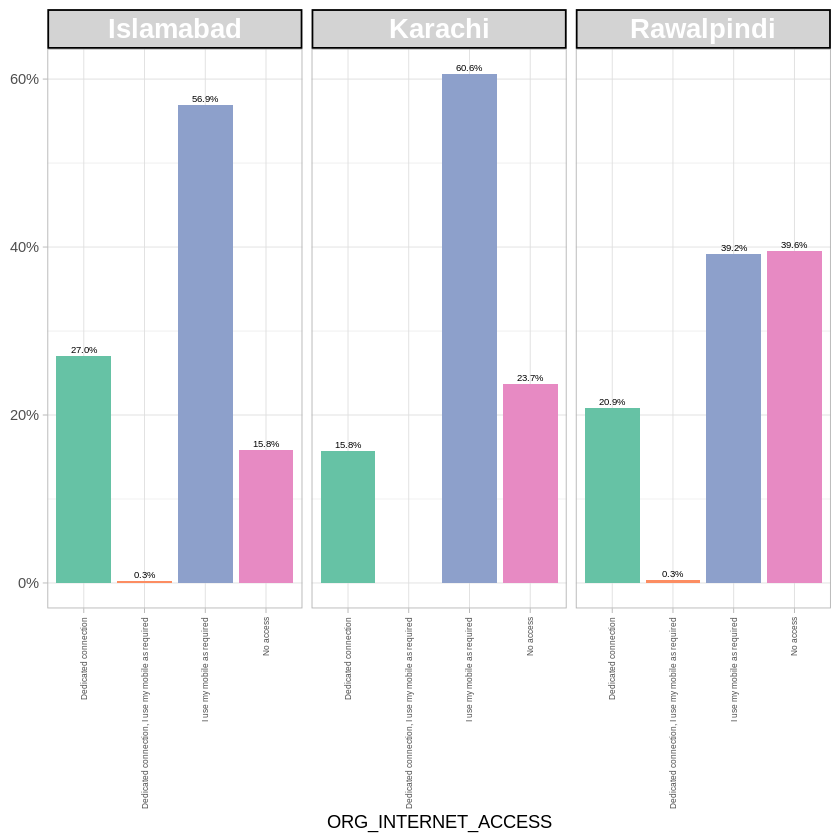

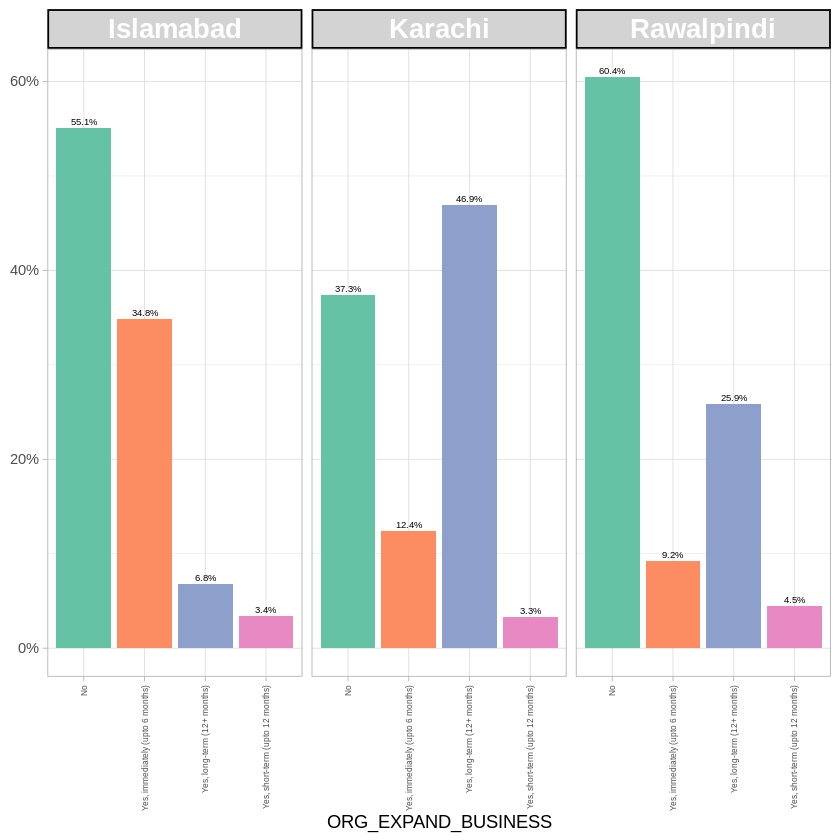

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


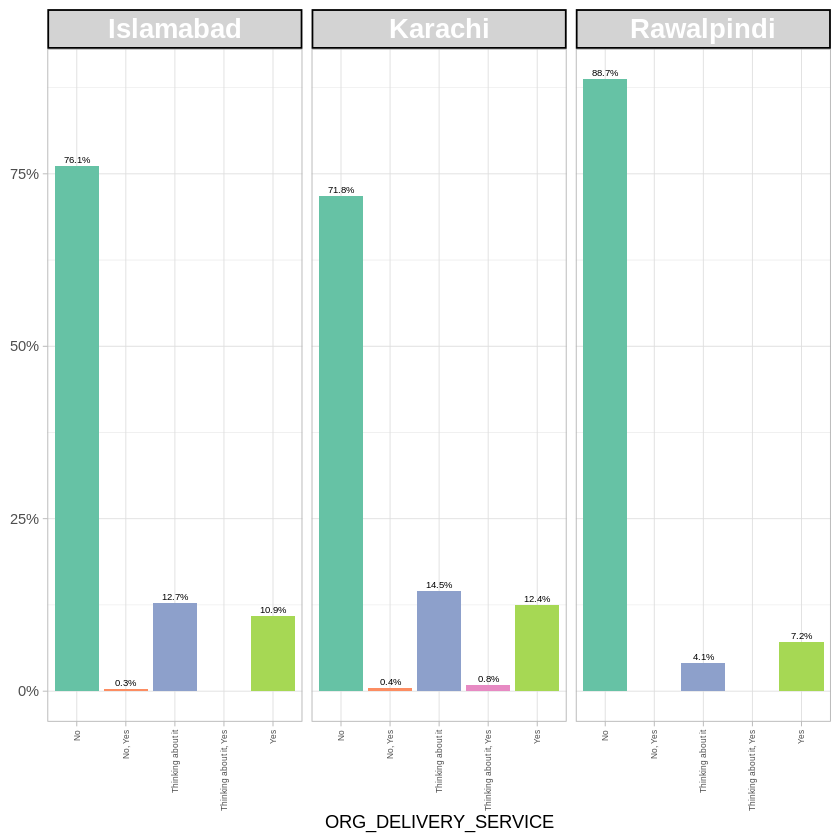

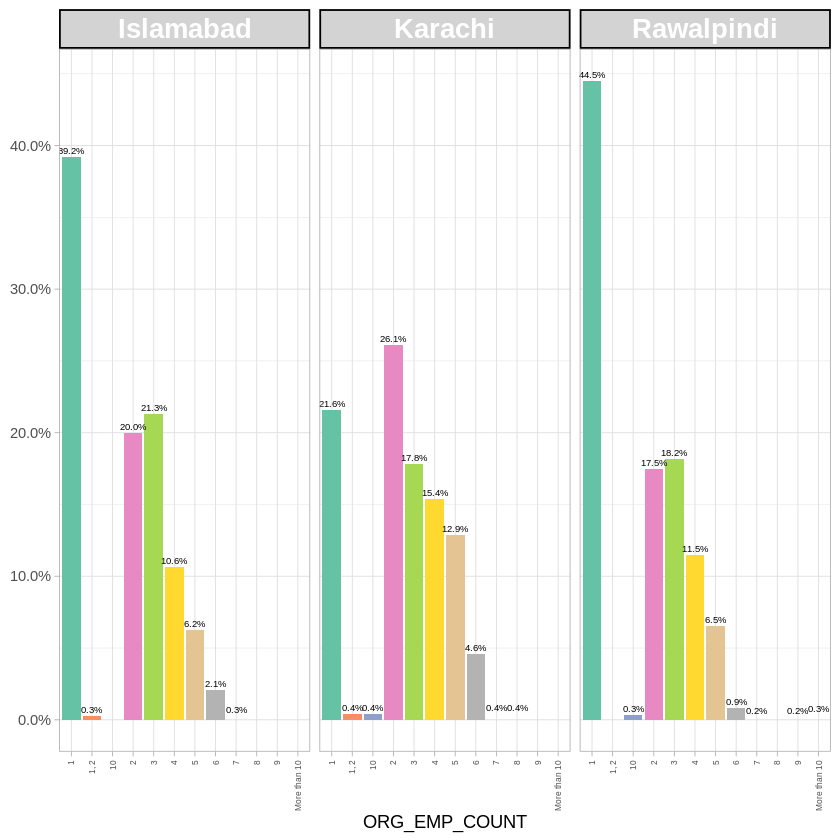

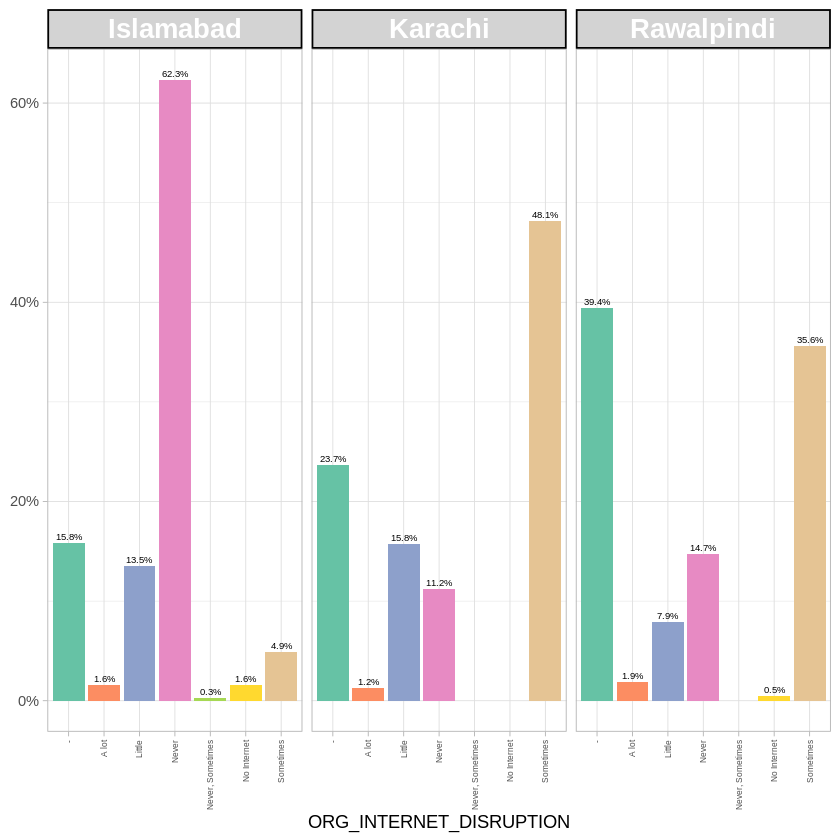

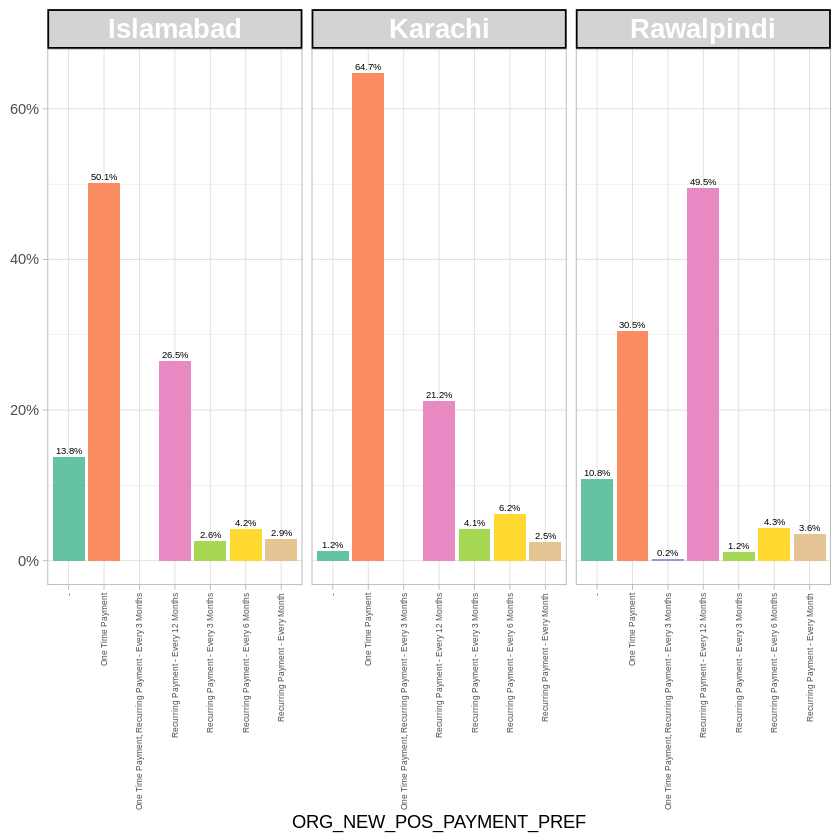

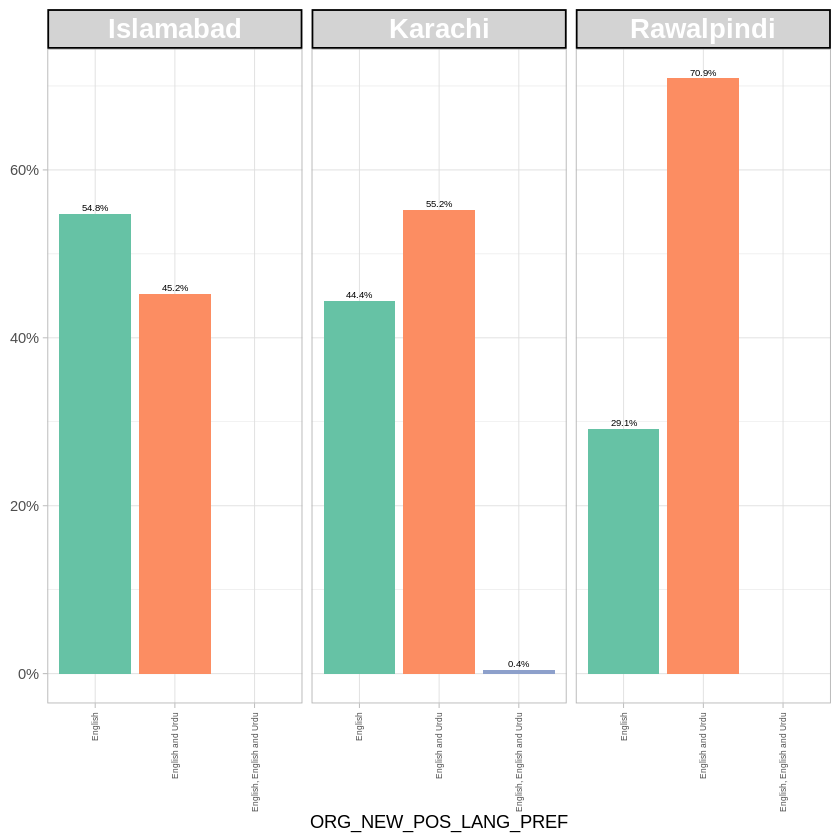

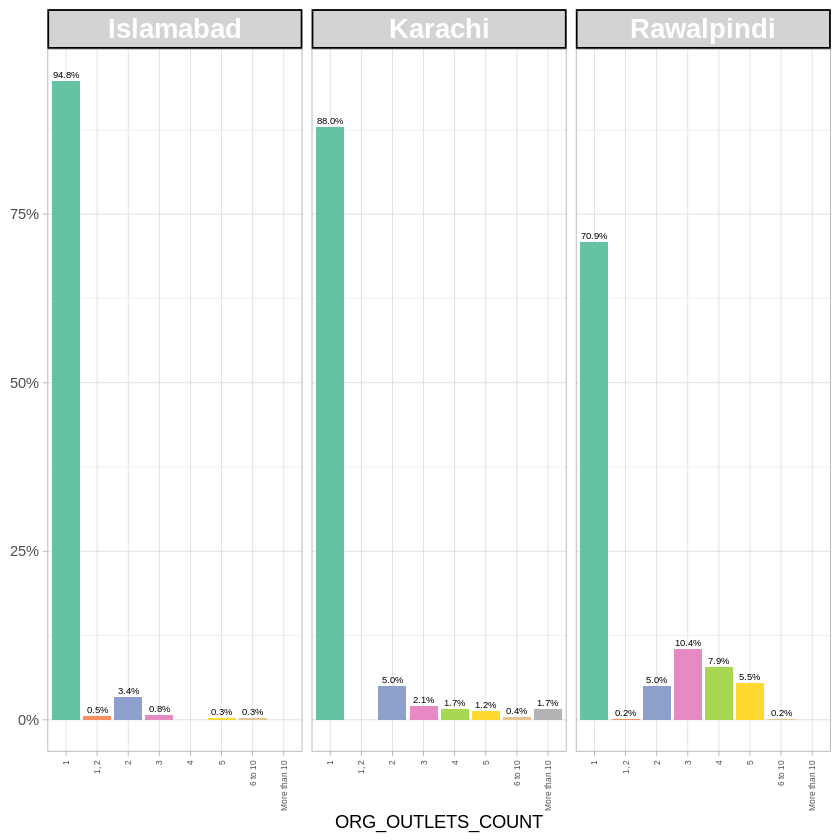

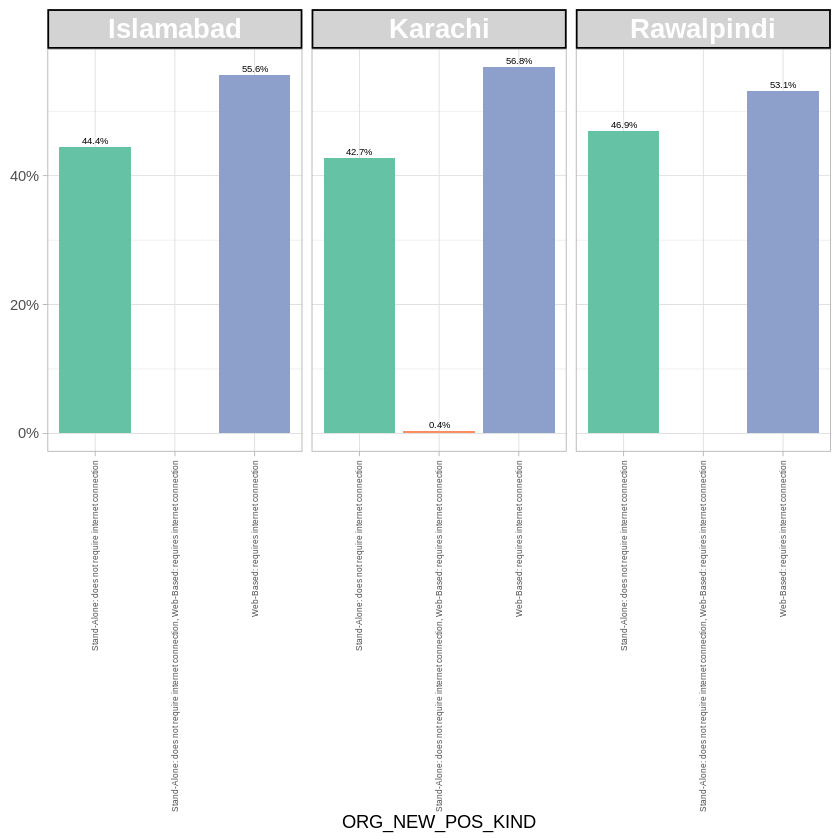

$ORG_POS_BUSINESS_IMPROVEMENT

$ORG_INTERNET_ACCESS

$ORG_EXPAND_BUSINESS

$ORG_DELIVERY_SERVICE

$ORG_EMP_COUNT

$ORG_INTERNET_DISRUPTION

$ORG_NEW_POS_PAYMENT_PREF

$ORG_NEW_POS_LANG_PREF

$ORG_OUTLETS_COUNT

$ORG_NEW_POS_KIND

$ORG_WILLINGNESS_DEMO

$ORG_WILLINGNESS_FUTURE_CONTACT


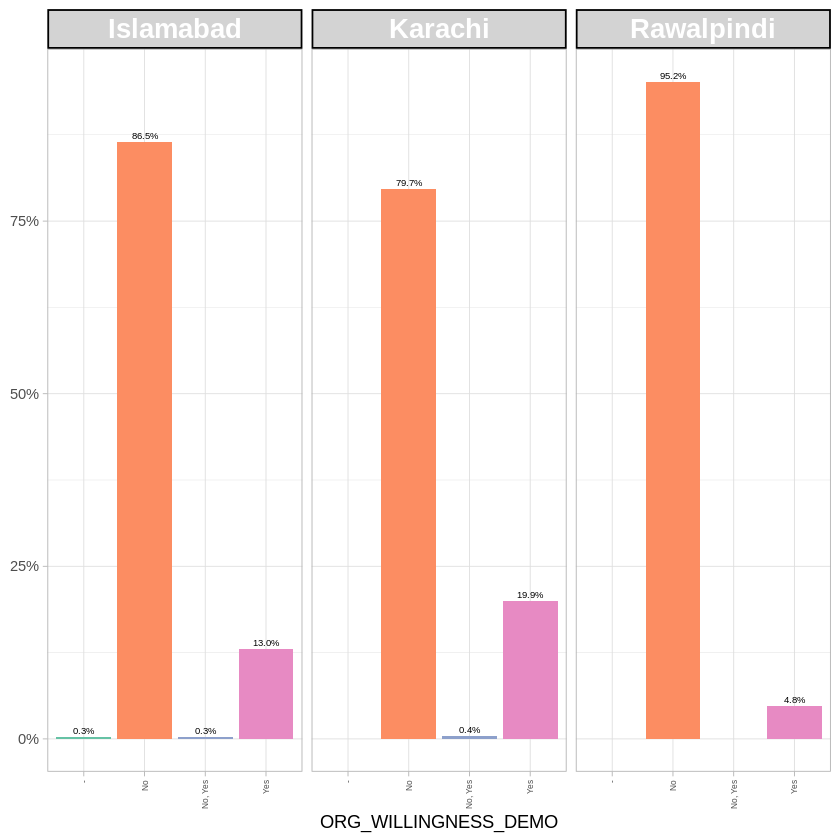

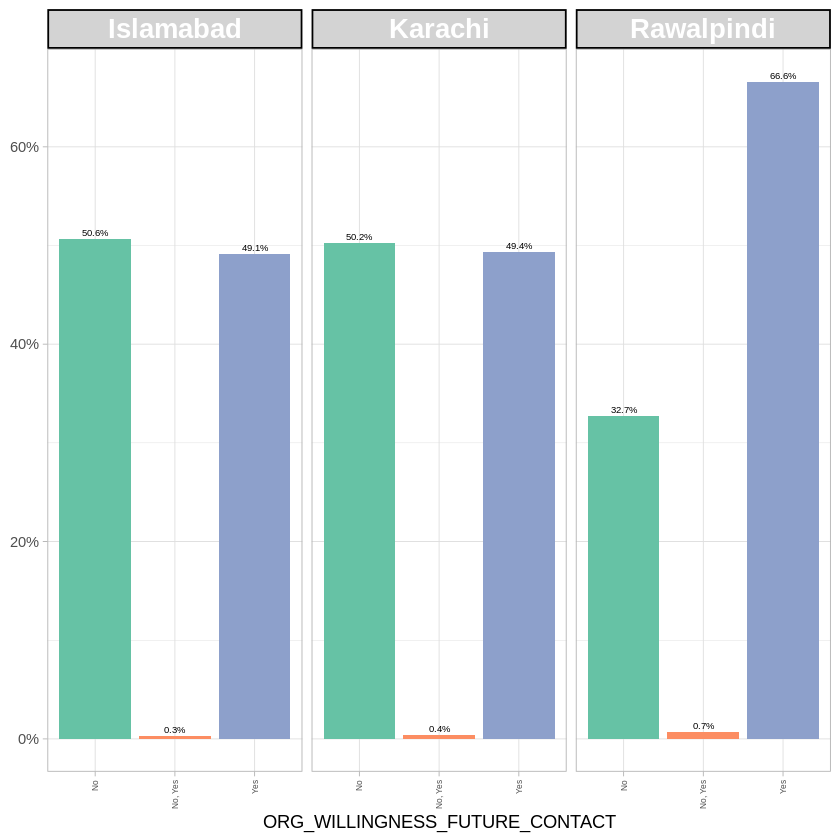

In [181]:
uni_plots

In [120]:
# SB_REGION should be plotted, without facetting
#'SB_REGION'

In [182]:
# printing the plots
pdf("All_Scatter_WithoutPOS.pdf")
uni_plots
dev.off()

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


$ORG_POS_BUSINESS_IMPROVEMENT

$ORG_INTERNET_ACCESS

$ORG_EXPAND_BUSINESS

$ORG_DELIVERY_SERVICE

$ORG_EMP_COUNT

$ORG_INTERNET_DISRUPTION

$ORG_NEW_POS_PAYMENT_PREF

$ORG_NEW_POS_LANG_PREF

$ORG_OUTLETS_COUNT

$ORG_NEW_POS_KIND

$ORG_WILLINGNESS_DEMO

$ORG_WILLINGNESS_FUTURE_CONTACT


png 
  2

# Dumping Data for Further Analysis

In [172]:
st=format(Sys.Date(), "%Y%b%d") # Alphabetic Month Name
survey_data_file = paste ("SurveyData-", "withPOS-",st, ".xlsx", sep="")
print(survey_data_file)

[1] "SurveyData-withPOS-2021May10.xlsx"


In [173]:
## Create a new workbook
wb <- createWorkbook("Temp")
## Add 1 worksheets
addWorksheet(wb, "All POS Survey")
writeData(wb, "All POS Survey", df_3)
#saveWorkbook(wb, "SurveyData-20201028-North.xlsx", overwrite = TRUE)
saveWorkbook(wb, survey_data_file, overwrite = TRUE)

# Summary
 The above analysis is for 'With POS'

 It excludes uni-var analysis for certain variables - (multiple choice options):

1.   ORG_TYPE
2.   ORG_DISCOUNTS_OFFERED
3.   ORG_CUSTOMER_DATA
4.   ORG_POS_FEATURES
5.   ORG_OLD_POS_PAYMENT_OPTIONS
6.   ORG_OLD_POS_DEVICES
7.   ORG_OLD_POS_URDU_FEATURES
8.   ORG_REASON_TO_REPLACE_POS
9.   ORG_WILLINGNESS_TO_PAY_AMOUNT
10.   ORG_OLD_POS_PROVIDER_PAYMENT_METHOD




## ToDO

Fix uni-var analysis

